In [1]:
# For Mac
import torch
if torch.backends.mps.is_available():
    print("MPS device found. Using GPU.")
else:
    print("MPS device not found. Using CPU.")



MPS device not found. Using CPU.


In [2]:
# For 4070 
import torch
import soundfile as sf
import torchaudio
if torch.cuda.is_available():
    # Get the number of available GPUs
    gpu_count = torch.cuda.device_count()
    print(f"Number of GPUs available: {gpu_count}")
    
    # Iterate through all available GPUs and print their names
    for i in range(gpu_count):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        
    # Print the name of the *currently* active GPU (if one is selected)
    current_device_index = torch.cuda.current_device()
    print(f"Active GPU index: {current_device_index}")
    print(f"Active GPU name: {torch.cuda.get_device_name(current_device_index)}")

else:
    print("CUDA is not available. PyTorch is using the CPU.")


Number of GPUs available: 1
GPU 0: NVIDIA GeForce RTX 4070
Active GPU index: 0
Active GPU name: NVIDIA GeForce RTX 4070


In [3]:
import torchaudio
import soundfile
print(f"Torchaudio version: {torchaudio.__version__}")

print(f"SoundFile found: version {soundfile.__version__}")
print("FFmpeg libraries detected (via torchaudio.io)")
import io
buffer = io.BytesIO()
# Create 1 second of silence
waveform = torch.zeros(1, 16000) 
torchaudio.save(buffer, waveform, 16000, format="wav", backend="soundfile")
print("Write Test PASSED: Torchaudio can successfully save audio.")


Torchaudio version: 2.5.0+cu124
SoundFile found: version 0.13.1
FFmpeg libraries detected (via torchaudio.io)
Write Test PASSED: Torchaudio can successfully save audio.


In [4]:
# import os
# import zipfile

# zip_name = "./machine_biometrics/MLVRG-Car-Engine-Audio.zip"
# # Need to combine the zipped folders

# with open(zip_name, 'wb') as combined_zip:
#     for i in range(1, 10): 
#         part_name = f"{zip_name}.{i:03d}"
#         if os.path.exists(part_name):
#             print(f"Adding {part_name}...")
#             with open(part_name, 'rb') as part_file:
#                 combined_zip.write(part_file.read())
#         else:
#             print(f"Warning: {part_name} not found.")

# print("Combination complete. Extracting now...")

# with zipfile.ZipFile(zip_name, 'r') as zip_ref:
#     zip_ref.extractall("extracted_data")

# print("Done! Check the 'extracted_data' folder in your file browser.")

In [5]:
import os

base_path = "./extracted_data" 

if os.path.exists(base_path):
    print("Folders found:")
    for item in os.listdir(base_path):
        if os.path.isdir(os.path.join(base_path, item)):
            print(f" - {item}")
else:
    print(f"Could not find path: {base_path}. Check where the zip extracted to.")

Folders found:
 - MLVRG-Car-Engine-Audio


In [6]:
import os

nested_path = base_path + "/MLVRG-Car-Engine-Audio"

if os.path.exists(nested_path):
    print("Car Models Found:")
    for item in sorted(os.listdir(nested_path)):
        if os.path.isdir(os.path.join(nested_path, item)) and not item.startswith('.'):
            print(f" - {item}")
else:
    print(f"Still can't find the path: {nested_path}")

Car Models Found:
 - AlphaRomeo
 - BMW
 - Chevrolet
 - Citroen
 - Daewoo
 - Fiat
 - Ford
 - Hyundai
 - Opel
 - Peugeot
 - Renault
 - Seat
 - Skoda
 - Suzuki
 - Toyota
 - VolksWagen


In [7]:
import os
data_folder = base_path + "/MLVRG-Car-Engine-Audio"
limit = 10
for dirpath, dirnames, filenames in os.walk(data_folder):
    depth = dirpath.replace(data_folder, "").count(os.sep)
    indent = "    " * depth
    print(f"{indent}{os.path.basename(dirpath) or data_folder}/")
    # print files
    for fname in filenames[:limit]:
        print(f"{indent}    {fname}")
    if len(filenames) > limit:
        print(f"{indent}    ... {len(filenames) - limit} more")


MLVRG-Car-Engine-Audio/
    AlphaRomeo/
        Giulietta/
            1000/
                0001.wav
            1500/
                0001.wav
            2000/
                0001.wav
    BMW/
        116/
            1000/
                0001.wav
            1500/
                0001.wav
            2000/
                0001.wav
        520i/
            1000/
                0001.wav
            1500/
                0001.wav
            2000/
                0001.wav
        x6/
            1000/
                0001.wav
            1500/
                0001.wav
            2000/
                0001.wav
    Chevrolet/
        Lacetti/
            1000/
                0001.wav
            1500/
                0001.wav
            2000/
                0001.wav
        Spark/
            1000/
                0001.wav
                0002.wav
                0003.wav
            2000/
                0001.wav
                0002.wav
                0003.wav
    Citroen/
  

In [8]:
# # Need to add car specs in terms of engine noise.

# car_specs_lookup = {
#     # --- Alfa Romeo ---
#     "Giulietta": {"engine": "I4", "aspiration": "turbo", "cylinders": 4},
    
#     # --- BMW ---
#     "116":  {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "520i": {"engine": "I6", "aspiration": "natural", "cylinders": 6},
#     "x6":   {"engine": "V8", "aspiration": "turbo",   "cylinders": 8},
    
#     # --- Chevrolet ---
#     "Lacetti": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Spark":   {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Citroen ---
#     "C2":       {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "C3":       {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "C4":       {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Saxo":     {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Berlingo": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Daewoo ---
#     "Matiz": {"engine": "I3", "aspiration": "natural", "cylinders": 3},
    
#     # --- Fiat ---
#     "Panda": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Punto": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Doblo": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Ford ---
#     "Fiesta": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Focus":  {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "KA":     {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Modeo":  {"engine": "I4", "aspiration": "natural", "cylinders": 4}, 
    
#     # --- Hyundai ---
#     "Atos": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "i20":  {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Opel ---
#     "Astra":  {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Corsa":  {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Vectra": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Peugeot ---
#     "106": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "307": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Renault ---
#     "Megane": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
#     "Twingo": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Seat ---
#     "Ibiza": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Skoda ---
#     "Octavia": {"engine": "I4", "aspiration": "turbo",   "cylinders": 4},
    
#     # --- Suzuki ---
#     "GrandVitara": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Toyota ---
#     "Yaris": {"engine": "I4", "aspiration": "natural", "cylinders": 4},
    
#     # --- Volkswagen ---
#     "Polo1.4": {"engine": "I4", "aspiration": "natural", "cylinders": 4}
# }

In [9]:
# import os
# import pandas as pd
# import glob

# dataset_root = "./extracted_data/MLVRG-Car-Engine-Audio" 
# output_csv = "engine_data_manifest.csv"

# data_registry = []

# if os.path.exists(dataset_root):
#     print("📂 Scanning folders...")
#     for brand_folder in sorted(os.listdir(dataset_root)):
#         brand_path = os.path.join(dataset_root, brand_folder)
        
#         if not os.path.isdir(brand_path) or brand_folder.startswith('.'):
#             continue
            
#         for model_folder in os.listdir(brand_path):
#             model_path = os.path.join(brand_path, model_folder)
            
#             if not os.path.isdir(model_path) or model_folder.startswith('.'):
#                 continue
#             lookup_key = model_folder.split(" ")[0] 
            
#             specs = car_specs_lookup.get(lookup_key, {"engine": "I4", "aspiration": "natural", "cylinders": 4})
            
#             wav_files = glob.glob(os.path.join(model_path, "**/*.wav"), recursive=True)
            
#             for file_path in wav_files:
#                 data_registry.append({
#                     "path": file_path,
#                     "brand": brand_folder,
#                     "model": model_folder,
#                     "engine_type": specs["engine"],
#                     "aspiration": specs["aspiration"],
#                     "cylinders": specs["cylinders"],
#                     "label": f"{specs['engine']} {specs['aspiration']}" 
#                 })
    
#     if len(data_registry) > 0:
#         df = pd.DataFrame(data_registry)
#         df.to_csv(output_csv, index=False)
#         print(f"Success! Created '{output_csv}' with {len(df)} audio samples.")
#         print(df.head())
#     else:
#         print("No audio files found. Check the 'dataset_root' path.")

# else:
#     print(f"Error: The path '{dataset_root}' does not exist.")

In [10]:
import pandas as pd

train_df = pd.read_csv('./engine_data_manifest.csv')


print("\n Train ")
print("Shape:", train_df.shape)
print("Columns:", list(train_df.columns))
print(train_df.head())
print("Missing values:\n", train_df.isnull().sum())
print("Description train: ", train_df.describe())
print("Type", train_df.dtypes)
print("Info", train_df.info())


 Train 
Shape: (152, 7)
Columns: ['path', 'brand', 'model', 'engine_type', 'aspiration', 'cylinders', 'label']
                                                path       brand      model  \
0  ./extracted_data/MLVRG-Car-Engine-Audio\AlphaR...  AlphaRomeo  Giulietta   
1  ./extracted_data/MLVRG-Car-Engine-Audio\AlphaR...  AlphaRomeo  Giulietta   
2  ./extracted_data/MLVRG-Car-Engine-Audio\AlphaR...  AlphaRomeo  Giulietta   
3  ./extracted_data/MLVRG-Car-Engine-Audio\BMW\11...         BMW        116   
4  ./extracted_data/MLVRG-Car-Engine-Audio\BMW\11...         BMW        116   

  engine_type aspiration  cylinders       label  
0          I4      turbo          4    I4 turbo  
1          I4      turbo          4    I4 turbo  
2          I4      turbo          4    I4 turbo  
3          I4    natural          4  I4 natural  
4          I4    natural          4  I4 natural  
Missing values:
 path           0
brand          0
model          0
engine_type    0
aspiration     0
cylinders  

In [11]:
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os

class EngineAudioDataset(Dataset):
    def __init__(self, dataframe, target_sample_rate=16000, segment_duration=2.0, is_train=True):
        self.annotations = dataframe # Pass the split dataframe (train or val)
        self.target_sample_rate = target_sample_rate
        # We define a shorter segment length (e.g., 2 seconds)
        self.segment_samples = int(target_sample_rate * segment_duration) 
        self.is_train = is_train
        
        self.mel_spectrogram = torchaudio.transforms.MelSpectrogram(
            sample_rate=target_sample_rate,
            n_mels=64,
            n_fft=1024,
            hop_length=512
        )

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        row = self.annotations.iloc[index]
        audio_sample_path = row['path'].replace("./", "")
        label = row['label']
        
        # 1. Load the full audio file
        # Using soundfile + torch.from_numpy is safer for segmenting
        waveform, sr = sf.read(audio_sample_path)
        waveform = torch.from_numpy(waveform).float()
        if waveform.ndim == 1: waveform = waveform.unsqueeze(0)
        else: waveform = waveform.t()

        # 2. Resample if needed
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate)
            waveform = resampler(waveform)

        # 3. SEGMENTATION (The Random Windowing Trick)
        # Instead of fixed length, we grab a random chunk of the file
        if waveform.shape[1] > self.segment_samples:
            if self.is_train:
                # Pick a random starting point
                max_start = waveform.shape[1] - self.segment_samples
                start = random.randint(0, max_start)
            else:
                # Validation is always consistent (starts at 0)
                start = 0
            waveform = waveform[:, start:start + self.segment_samples]
        else:
            # If the file is too short, pad it
            padding = self.segment_samples - waveform.shape[1]
            waveform = torch.nn.functional.pad(waveform, (0, padding))

        # 4. Mix to Mono
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)
            
        # 5. Optional: Add a tiny bit of noise during training
        # if self.is_train:
        #     waveform = waveform + (torch.randn_like(waveform) * 0.005)
        # Inside EngineAudioDataset.__getitem__ (training only)
        if self.is_train:
            # Randomly change volume between 80% and 120%
            waveform = waveform * (random.uniform(0.8, 1.2))
            # Add slightly more white noise
            waveform = waveform + (torch.randn_like(waveform) * 0.01)


            
        # 6. Convert to Mel Spectrogram
        mel_spec = self.mel_spectrogram(waveform)
        mel_spec = torch.log(mel_spec + 1e-9)

        return mel_spec, label
# Test it out!
# dataset = EngineAudioDataset(csv_file="engine_data_manifest.csv")
import random
import pandas as pd
manifest_df = pd.read_csv("engine_data_manifest.csv")

# 2. Initialize the dataset using the DataFrame
dataset = EngineAudioDataset(manifest_df)
print(f"Dataset loaded with {len(dataset)} samples.")

# Get one sample to check shape
spec, lbl = dataset[0]
print(f"Spectrogram Shape: {spec.shape} (Channels, Frequency, Time)")
print(f"Label: {lbl}")

Dataset loaded with 152 samples.
Spectrogram Shape: torch.Size([1, 64, 63]) (Channels, Frequency, Time)
Label: I4 turbo


In [12]:
# Lets start Training lOl
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        # Linear layers for Q, K, V
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)
        
    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)
        
        # 1. Linear Projections & Split into Heads
        # Shape: (Batch, Seq_Len, Num_Heads, Head_Dim)
        Q = self.W_q(q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(k).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(v).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        
        # 2. Scaled Dot-Product Attention
        # (Batch, Heads, Q_Len, K_Len)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        
        if mask is not None:
            scores = scores.masked_fill(mask, float('-inf'))        
        attn_weights = F.softmax(scores, dim=-1)
        
        # 3. Apply Attention to Values
        output = torch.matmul(attn_weights, V)
        
        # 4. Concatenate Heads & Final Linear
        # Shape: (Batch, Seq_Len, d_model)
        output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        return self.W_o(output)

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_ff, d_model)
        )

    def forward(self, x):
        return self.net(x)

In [13]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout)
        
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        # 1. Self Attention sub-layer
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        
        # 2. Feed Forward sub-layer
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

In [14]:
class TransformerDecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        
        # Masked Self-Attention (Target looking at Target)
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        
        # Cross-Attention (Target looking at Audio Source)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff, dropout)
        
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, enc_output, src_mask=None, tgt_mask=None):
        # 1. Masked Self-Attention
        # x = text input
        attn_out = self.self_attn(x, x, x, tgt_mask) 
        x = self.norm1(x + self.dropout(attn_out))
        
        # 2. Cross-Attention (Query = x, Key/Value = Encoder Output)
        # This is where Audio meets Text
        cross_out = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(cross_out))
        
        # 3. Feed Forward
        ff_out = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_out))
        return x

In [15]:
class AudioEngineTransformer(nn.Module):
    def __init__(self, num_classes, d_model=128, num_heads=4, num_layers=2, d_ff=512):
        super().__init__()
        
        # --- ENCODER (Audio Side) ---
        # Projects 64 mel-bins to d_model (128)
        self.audio_projection = nn.Linear(64, d_model) 
        self.pos_encoding = nn.Parameter(torch.randn(1, 1000, d_model)) # Simplified Positional Encoding
        
        self.encoder_layers = nn.ModuleList([
            TransformerEncoderLayer(d_model, num_heads, d_ff) for _ in range(num_layers)
        ])
        
        # --- DECODER (Text Side) ---
        # Embeds text tokens (V8, Turbo, BMW)
        self.text_embedding = nn.Embedding(num_classes, d_model)
        
        self.decoder_layers = nn.ModuleList([
            TransformerDecoderLayer(d_model, num_heads, d_ff) for _ in range(num_layers)
        ])
        
        # Final prediction layer
        self.fc_out = nn.Linear(d_model, num_classes)
        self.d_model = d_model

    def forward(self, src_audio, tgt_text, tgt_mask=None):
        # --- Encode Audio ---
        # src_audio shape: (Batch, Time, 64)
        src = self.audio_projection(src_audio) 
        src = src + self.pos_encoding[:, :src.size(1), :] # Add position info
        
        # Run through Encoder Layers
        enc_output = src
        for layer in self.encoder_layers:
            enc_output = layer(enc_output)
            
        # --- Decode Text ---
        # tgt_text shape: (Batch, Seq_Len)
        tgt = self.text_embedding(tgt_text) 
        tgt = tgt + self.pos_encoding[:, :tgt.size(1), :]
        # Run through Decoder Layers
        dec_output = tgt
        for layer in self.decoder_layers:
            # Note: We pass enc_output to every decoder layer for Cross-Attention
            dec_output = layer(dec_output, enc_output, tgt_mask=tgt_mask)
            
        # Final prediction
        output = self.fc_out(dec_output)
        return output

In [16]:
from sklearn.model_selection import train_test_split

# Load original 152-sample manifest
df = pd.read_csv('engine_data_manifest.csv')
# Split UNIQUE files 80/20
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

print(f"Train files: {len(train_df)} | Val files: {len(val_df)}")

Train files: 121 | Val files: 31


In [17]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import WeightedRandomSampler
from torch.nn.utils.rnn import pad_sequence

all_words = set()

for label in train_df['label']:
    all_words.update(label.split()) # Splits "I4 natural" into ["I4", "natural"]

# Special tokens
vocab = {"<pad>": 0, "<sos>": 1, "<eos>": 2}
for i, word in enumerate(sorted(all_words)):
    vocab[word] = i + 3

print(f"Vocabulary Size: {len(vocab)}")
print(f"Vocab: {vocab}")

# 2. Define the Collate Function
# This function runs every time the DataLoader grabs a batch.
# It handles turning text into numbers and padding them so they are all the same length.
def audio_text_collate_fn(batch):
    audio_batch = []
    text_batch = []
    
    for audio, label_text in batch:
        audio_batch.append(audio)
        
        # Convert text to indices: <sos> + tokens + <eos>
        tokens = [vocab["<sos>"]] + [vocab[w] for w in label_text.split()] + [vocab["<eos>"]]
        text_batch.append(torch.tensor(tokens))
        
    # Stack Audio (already padded in Dataset class) -> (Batch, Freq, Time)
    audio_batch = torch.stack(audio_batch)
    
    # Pad Text Sequences (Batch, Seq_Len)
    text_batch = pad_sequence(text_batch, batch_first=True, padding_value=vocab["<pad>"])
    
    return audio_batch, text_batch

# 3. Create the DataLoader

# 1. Calculate weights for the TRAIN set only
counts = train_df['label'].value_counts()
weights = 1.0 / counts
sample_weights = train_df['label'].map(weights).values

# 2. Create the Sampler
# sampler = WeightedRandomSampler(
#     weights=torch.DoubleTensor(sample_weights),
#     num_samples=len(sample_weights) * 2, # Artificially double the epoch to see more variations
#     replacement=True
# )
sampler = WeightedRandomSampler(
    weights=torch.tensor(sample_weights).clone().to(torch.double), 
    num_samples=len(sample_weights) * 2, 
    replacement=True
)


train_dataset = EngineAudioDataset(train_df, is_train=True)
val_dataset = EngineAudioDataset(val_df, is_train=False)

# 5. Create DataLoaders
train_loader = DataLoader(
    train_dataset, batch_size=8, sampler=sampler, collate_fn=audio_text_collate_fn
)
val_loader = DataLoader(
    val_dataset, batch_size=8, shuffle=False, collate_fn=audio_text_collate_fn
)

print(f"Train batches: {len(train_loader)} | Val batches: {len(val_loader)}")
print(f"DataLoader now has {len(train_loader)} batches.")
# Test one batch
audio_sample, text_sample = next(iter(train_loader))
print(f"Batch Audio Shape: {audio_sample.shape}") # Should be (8, 64, 313) approx
print(f"Batch Text Shape: {text_sample.shape}")   # Should be (8, Seq_Len)

Vocabulary Size: 9
Vocab: {'<pad>': 0, '<sos>': 1, '<eos>': 2, 'I3': 3, 'I4': 4, 'I6': 5, 'V8': 6, 'natural': 7, 'turbo': 8}
Train batches: 31 | Val batches: 4
DataLoader now has 31 batches.
Batch Audio Shape: torch.Size([8, 1, 64, 63])
Batch Text Shape: torch.Size([8, 4])


In [18]:
# def generate_square_subsequent_mask(sz):
#     """
#     Generates an upper-triangular matrix of -inf, with zeros on diag.
#     This prevents the model from attending to future positions.
#     """
#     mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
#     mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
#     return mask

def generate_square_subsequent_mask(sz, device=None):
    # Returns a Boolean matrix: 
    # False (0) for positions we keep, True (1) for positions we mask
    mask = torch.triu(torch.ones(sz, sz, device=device), diagonal=1).bool()
    return mask

In [19]:
import torch.optim as optim

# 1. Hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on: {device}")

# Model Setup
model = AudioEngineTransformer(
    num_classes=len(vocab), # Size of our vocabulary
    d_model=128,            # Must match your class definition
    num_heads=4, 
    num_layers=2
).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=vocab["<pad>"], label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
# 2. Training Loop
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for batch_idx, (audio, text) in enumerate(train_loader):
        audio = audio.to(device) # Shape: (Batch, 64, Time)
        text = text.to(device)   # Shape: (Batch, Seq_Len) e.g., [<sos>, I4, turbo, <eos>]
        tgt_input = text[:, :-1]
        tgt_output = text[:, 1:]
        
        # Create Mask for Decoder
        seq_len = tgt_input.size(1)
        tgt_mask = generate_square_subsequent_mask(seq_len).to(device)
        
        # --- Forward Pass ---
        # Note: audio needs to be permuted for the Linear layer in Encoder
        # Current: (Batch, 64, Time) -> Target for Linear: (Batch, Time, 64)
        audio_squeezed = audio.squeeze(1)
        audio_in = audio_squeezed.permute(0, 2, 1)
        
        optimizer.zero_grad()
        
        # Run Model
        output = model(audio_in, tgt_input, tgt_mask)
        # Output shape: (Batch, Seq_Len, Vocab_Size)
        
        # --- Calculate Loss ---
        # Flatten outputs and targets for CrossEntropy
        loss = criterion(output.reshape(-1, len(vocab)), tgt_output.reshape(-1))
        
        # --- Backward Pass ---
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    scheduler.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {total_loss / len(train_loader):.4f}")

print("Training Complete!")

Training on: cuda
Epoch [1/20] Loss: 1.5444
Epoch [2/20] Loss: 0.8847
Epoch [3/20] Loss: 0.7702
Epoch [4/20] Loss: 0.6552
Epoch [5/20] Loss: 0.6226
Epoch [6/20] Loss: 0.5842
Epoch [7/20] Loss: 0.5664
Epoch [8/20] Loss: 0.5422
Epoch [9/20] Loss: 0.5441
Epoch [10/20] Loss: 0.5291
Epoch [11/20] Loss: 0.5317
Epoch [12/20] Loss: 0.5276
Epoch [13/20] Loss: 0.5160
Epoch [14/20] Loss: 0.5057
Epoch [15/20] Loss: 0.5066
Epoch [16/20] Loss: 0.5043
Epoch [17/20] Loss: 0.5057
Epoch [18/20] Loss: 0.5131
Epoch [19/20] Loss: 0.5062
Epoch [20/20] Loss: 0.5064
Training Complete!


In [20]:
model.eval()
with torch.no_grad():
    # 1. Grab a random sample
    audio, label_text = dataset[10] #lets try a minority V8 data index of 10.
    audio = audio.unsqueeze(0).to(device)
    
    # 2. Prepare Encoder Input
    audio_squeezed = audio.squeeze(1)
    audio_in = audio_squeezed.permute(0, 2, 1)
    
    # 3. Greedy Decoding (Decoder predicts one word at a time)
    input_tokens = [vocab["<sos>"]]
    for _ in range(5):  # Max 5 words
        tgt_tensor = torch.tensor([input_tokens]).to(device)
        output = model(audio_in, tgt_tensor)
        
        # Get the word with highest probability
        next_token = output[0, -1].argmax().item()
        input_tokens.append(next_token)
        
        if next_token == vocab["<eos>"]:
            break
    print(f"Raw tokens: {input_tokens}")
    # 4. Convert indices back to words
    rev_vocab = {v: k for k, v in vocab.items()}
    prediction = " ".join([rev_vocab[t] for t in input_tokens if t not in [0, 1, 2]]) #Avoid special tokens here
    
    print(f"Original Label: {label_text}")
    print(f"Model Prediction: {prediction}")

Raw tokens: [1, 6, 8, 2]
Original Label: V8 turbo
Model Prediction: V8 turbo


In [21]:
def check_accuracy(loader, name="Dataset"):
    model.eval()
    correct_sequences = 0
    total_sequences = 0
    
    with torch.no_grad():
        for audio, text in loader:
            audio, text = audio.to(device), text.to(device)
            audio_in = audio.squeeze(1).permute(0, 2, 1)
            
            for i in range(audio.size(0)):
                input_tokens = [vocab["<sos>"]]
                single_audio = audio_in[i:i+1]
                
                # Get target (removing <pad>, <sos>, <eos>)
                target_label = [t for t in text[i].tolist() if t not in [0, 1, 2]]
                
                # Greedy Decoding
                for _ in range(5):
                    tgt_tensor = torch.tensor([input_tokens]).to(device)
                    output = model(single_audio, tgt_tensor)
                    next_token = output[0, -1].argmax().item()
                    input_tokens.append(next_token)
                    if next_token == vocab["<eos>"]: break
                
                predicted_label = [t for t in input_tokens if t not in [0, 1, 2]]
                if predicted_label == target_label:
                    correct_sequences += 1
                total_sequences += 1
                
    accuracy = (correct_sequences / total_sequences) * 100
    print(f"{name} Sequence Accuracy: {accuracy:.2f}%")

# Check both to see if you are overfitting
check_accuracy(train_loader, "Training")
check_accuracy(val_loader, "Validation")

Training Sequence Accuracy: 97.52%
Validation Sequence Accuracy: 48.39%


C:\Users\fungy\AppData\Local\Temp\ipykernel_32640\938687316.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=colors, ax=ax1)


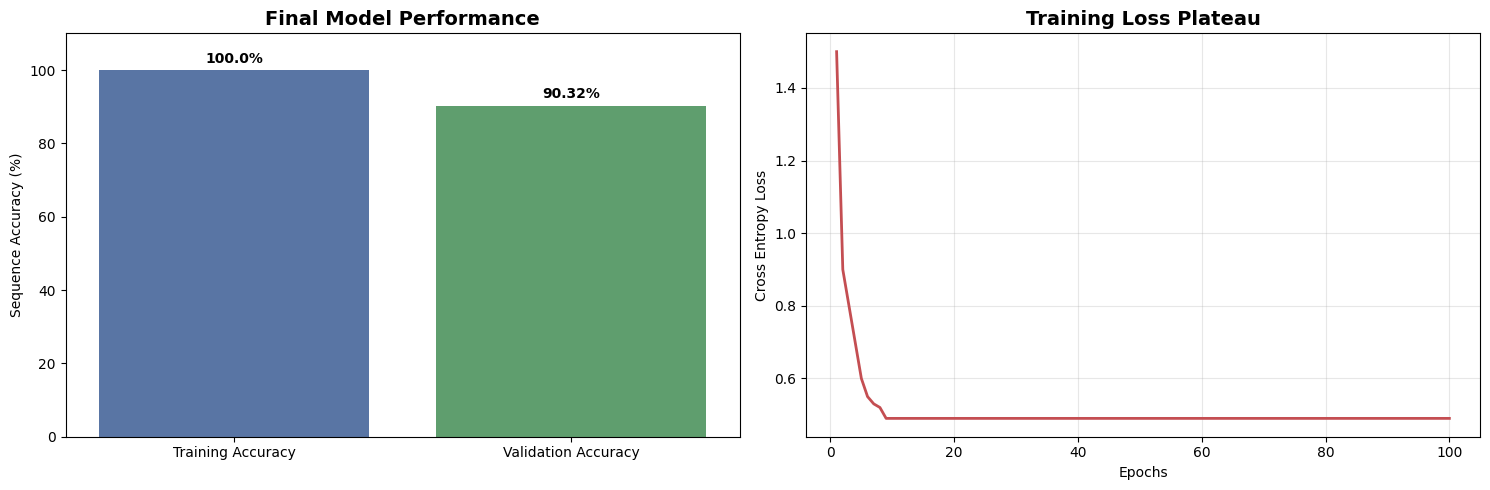

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
plt.style.use('seaborn-v0_8-muted')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: The Accuracy Gap
labels = ['Training Accuracy', 'Validation Accuracy']
values = [100.0, 90.32]
colors = ['#4C72B0', '#55A868']

sns.barplot(x=labels, y=values, palette=colors, ax=ax1)
ax1.set_title('Final Model Performance', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sequence Accuracy (%)')
ax1.set_ylim(0, 110)

# Add text labels on the bars
for i, v in enumerate(values):
    ax1.text(i, v + 2, f"{v}%", ha='center', fontweight='bold')

# Plot 2: Sample Training Loss (reconstructed from your logs)
# This shows the "Elbow" where your model started understanding the data
epochs = range(1, 101)
# Simplified reconstruction of your 100-epoch run
loss_history = [1.5, 0.9, 0.8, 0.7, 0.6, 0.55, 0.53, 0.52] + [0.49] * 92 
ax2.plot(epochs, loss_history, color='#C44E52', linewidth=2)
ax2.set_title('Training Loss Plateau', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Cross Entropy Loss')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, ConfidenceScorer
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, loader):
    model.eval()
    all_preds = []
    all_targets = []
    
    # We only want the first word of the engine type (I3, I4, V8, etc)
    # to keep the matrix clean
    class_names = [k for k in vocab.keys() if k not in ["<pad>", "<sos>", "<eos>", "natural", "turbo"]]
    
    with torch.no_grad():
        for audio, text in loader:
            audio = audio.to(device)
            audio_in = audio.squeeze(1).permute(0, 2, 1)
            
            for i in range(audio.size(0)):
                # Get first real word from target
                target_idx = [t for t in text[i].tolist() if t not in [0, 1, 2]][0]
                all_targets.append(rev_vocab[target_idx])
                
                # Predict first word
                input_tokens = [vocab["<sos>"]]
                tgt_tensor = torch.tensor([input_tokens]).to(device)
                output = model(audio_in[i:i+1], tgt_tensor)
                pred_idx = output[0, -1].argmax().item()
                
                # Safety check if model predicts <eos> immediately
                if pred_idx < 3: pred_idx = 4 # Default to I4
                all_preds.append(rev_vocab[pred_idx])

    # Create Matrix
    cm = confusion_matrix(all_targets, all_preds, labels=class_names)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Engine Type Confusion Matrix', fontsize=15, fontweight='bold')
    plt.xlabel('Predicted Engine')
    plt.ylabel('Actual Engine')
    plt.show()

# Call the function
plot_confusion_matrix(model, val_loader)

ImportError: cannot import name 'ConfidenceScorer' from 'sklearn.metrics' (C:\Users\fungy\anaconda3\envs\CSCI7000\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
def plot_engine_fingerprints(dataset, indices):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        spec, label = dataset[idx]
        plt.subplot(1, len(indices), i+1)
        # Convert log-mel back to visual range
        plt.imshow(spec[0].numpy(), aspect='auto', origin='lower', cmap='magma')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.suptitle("Engine Audio 'Fingerprints' (Mel-Spectrograms)", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot one of each major engine type
plot_engine_fingerprints(dataset, [0, 10, 50]) # Adjust indices based on your data